# Задача 4.1

In [33]:
import numpy as np
import math as mth
import scipy.stats as sps
import matplotlib.pyplot as plt
from __future__ import division

N = 1000
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Вычисление квадратичной ф-ции потерь

In [29]:
def evalue(theta):
    samples = list()
    for n in range(100):
        samples.append(sps.uniform.rvs(size=N, loc=0, scale=theta))
    eva = list();
    for i in range(4):
        eva.append(list())
    for i in range(100):
        for j in range(4):
            eva[j].append(list())
            
        for n in np.arange(1, N+1):
            eva[0][i].append((2*samples[i][:n].mean() - theta) ** 2 )
            eva[1][i].append(((n+1)*samples[i][:n].min() - theta) ** 2)
            eva[2][i].append((samples[i][:n].min()+samples[i][:n].max() - theta) ** 2)
            eva[3][i].append((samples[i][:n].max()*(n+1)/n - theta) ** 2)
    meaneval = list()
    
    for i in range(4):
        meaneval.append(list())

    for n in range(N):
        for j in range(4):
            meaneval[j].append(sum([eva[j][i][n] for i in range(100)])/100)
    plt.figure(figsize=(15, 22))
    colors = ['red', 'green', 'cyan', 'purple', 'orange']
    labels = [r'For $2\bar{X}$', r'For $(n+1)X_{(1)}$', r'For $X_{(1)}+X_{n}$', r'For $\frac{n+1}{n}X_{(n)}$']
    
    for j in range(4):
        plt.subplot(211)
        plt.plot(np.arange(1, N+1), meaneval[j], colors[j], linewidth=1, label=labels[j])
        plt.subplot(212)
        plt.plot(np.arange(1, N+1), meaneval[j], colors[j], linewidth=1, label=labels[j])
        
    plt.subplot(211)
    plt.title('Quadratic loss function')
    plt.legend()
    plt.xlabel('n')
    plt.ylabel(r'$\bar{(\hat{\theta}-\theta)^2}$')
    plt.xlim((1, N))
    plt.subplot(212)
    plt.title('Zoomed graph')
    plt.xlabel('n')
    plt.ylabel(r'$\bar{(\hat{\theta}-\theta)^2}$')
    plt.legend()
    plt.ylim((0, theta*0.101-0.1))
    plt.show()

### Построение графиков

Каждый график для наглядности построю еще и в увеличенном виде

##### $\theta = 1$

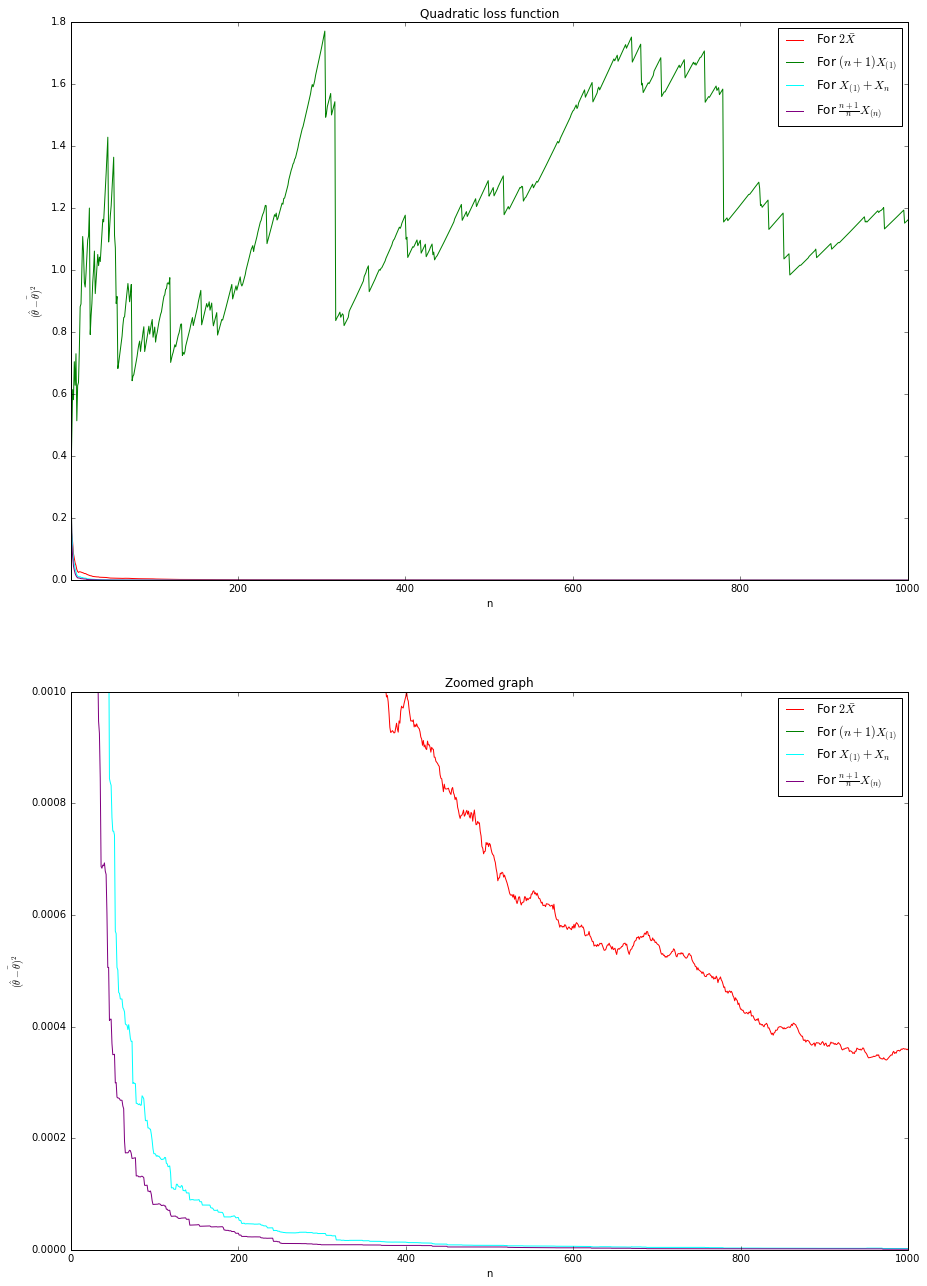

In [30]:
evalue(1)

#### $\theta=3$

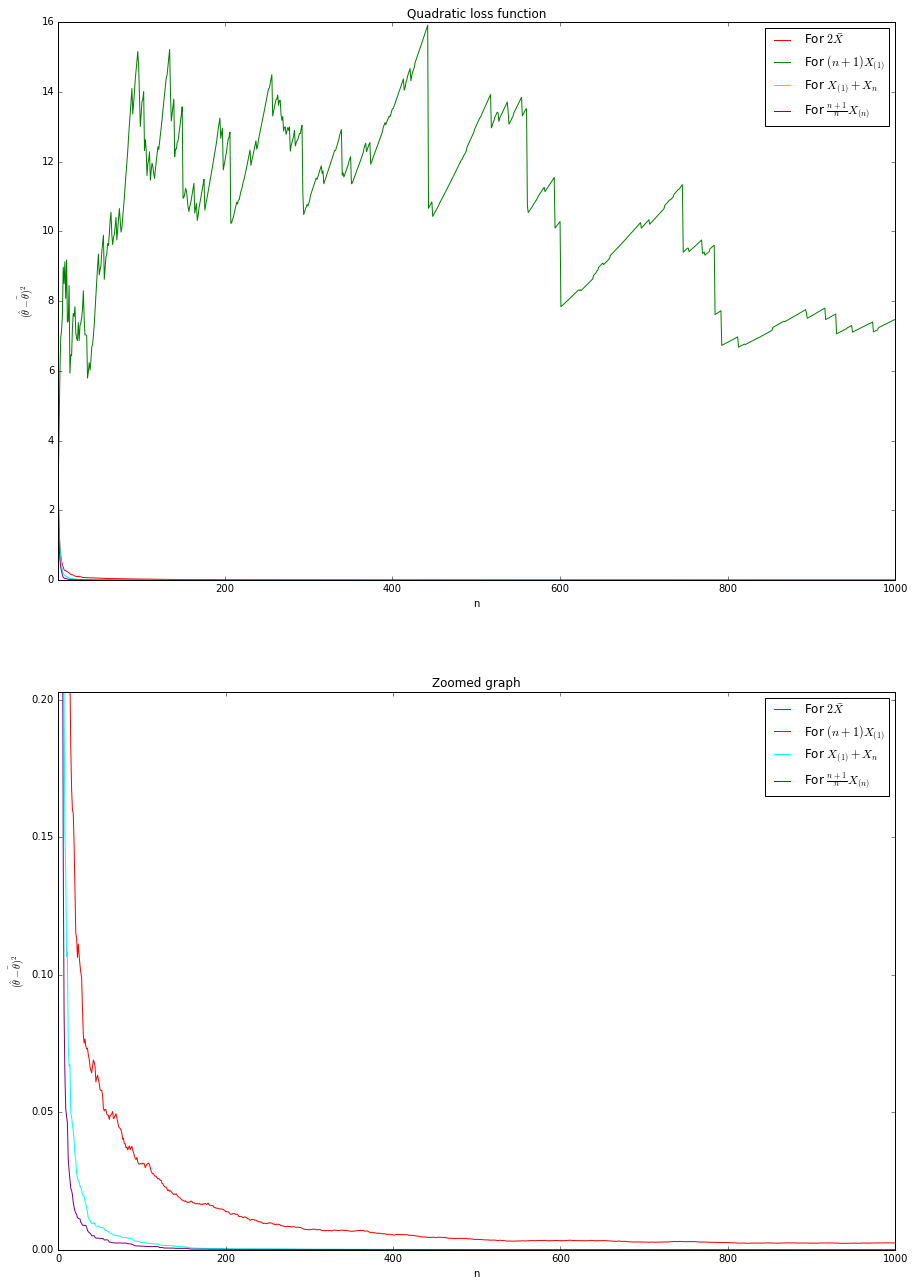

In [31]:
evalue(3)

#### $\theta=100$

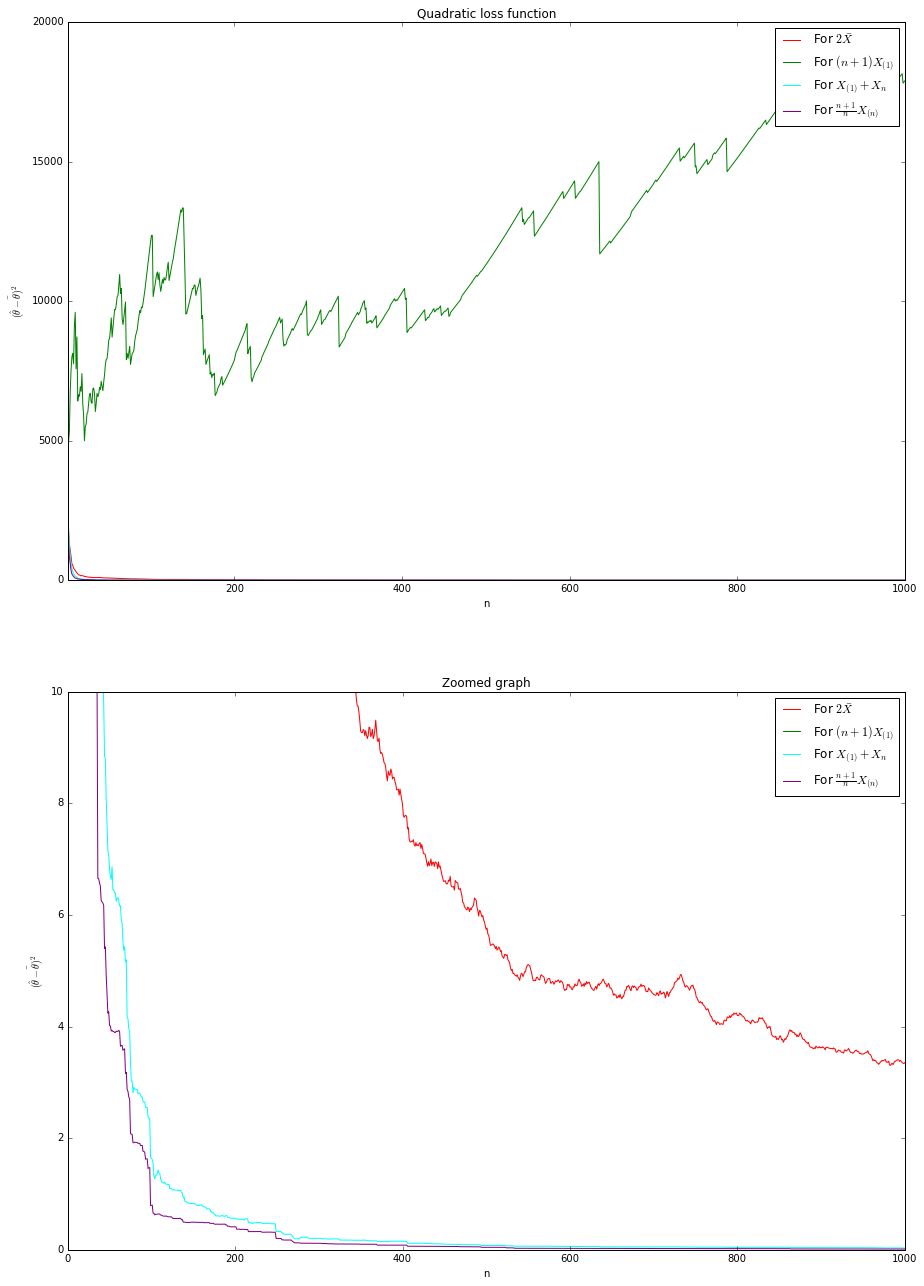

In [32]:
evalue(100)